In [43]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

from matplotlib import rcParams, cycler

plt.close('all')

In [44]:
DATA_PATH = "data/period_indicators.csv"

file = pd.read_csv(DATA_PATH)
data_mig = pd.DataFrame(file, columns= ['Location', 'MidPeriod', 'NetMigrations'])
data_mig[['MidPeriod', 'NetMigrations']] = data_mig[['MidPeriod', 'NetMigrations']].apply(pd.to_numeric)

In [45]:
data_mig_loc = data_mig.loc[data_mig['Location'] == 'Philippines']
data_mig_loc = data_mig_loc.loc[(data_mig_loc['MidPeriod'] <= 2020)]
data_mig_loc['NetMigrations'] /= 5
data_mig_loc['NetMigrations'] = data_mig_loc['NetMigrations'].abs()

Text(0.5, 1.0, 'Philippines')

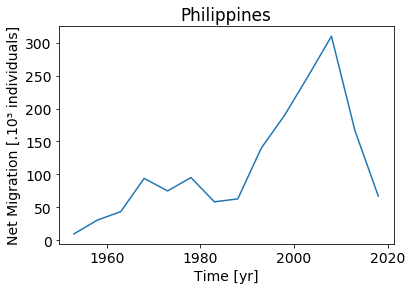

In [46]:
dates = np.asarray(data_mig_loc['MidPeriod'].drop_duplicates())

y = data_mig_loc['NetMigrations']
x = data_mig_loc['MidPeriod']

fig = plt.figure()
plt.plot(x, y)
plt.xlabel('Time [yr]')
plt.ylabel('Net Migration [.10³ individuals]')
plt.title('Philippines')

## In percentage of the population

In [47]:
DATA_PATH = "data/total_population.csv"

file = pd.read_csv(DATA_PATH)
data_pop = pd.DataFrame(file, columns= ['Location', 'Time', 'PopTotal'])
data_pop[['Time', 'PopTotal']] = data_pop[['Time', 'PopTotal']].apply(pd.to_numeric)

In [48]:
data_pop_loc = data_pop.loc[data_pop['Location'] == 'Philippines']
index = data_pop_loc['Time'].isin(dates)
data_pop_loc = data_pop_loc.loc[index]

In [55]:
print(data_mig_loc['NetMigrations'])
print(data_pop_loc['PopTotal'])
print(data_mig_loc['MigPercent'])

10140      9.8244
10141     30.7834
10142     43.6126
10143     94.0860
10144     75.0180
10145     95.3122
10146     58.4888
10147     62.9352
10148    139.7754
10149    189.8692
10150    248.8712
10151    309.6154
10152    166.9238
10153     67.1516
Name: NetMigrations, dtype: float64
197619     20669.608
197624     24567.266
197629     29012.630
197634     33795.203
197639     39022.759
197644     44838.485
197649     51408.910
197654     58794.999
197659     66593.904
197664     74672.009
197669     83051.970
197674     90901.967
197679     98871.558
197684    106651.394
Name: PopTotal, dtype: float64
10140   NaN
10141   NaN
10142   NaN
10143   NaN
10144   NaN
10145   NaN
10146   NaN
10147   NaN
10148   NaN
10149   NaN
10150   NaN
10151   NaN
10152   NaN
10153   NaN
Name: MigPercent, dtype: float64


In [54]:
num = np.asarray(data_mig_loc['NetMigrations'], dtype=float)
denom = np.asarray(data_pop_loc['PopTotal'], dtype=float)
data_mig_loc['MigPercent'] = num/denom

Text(0, 0.5, 'Net Migration Rate [%]')

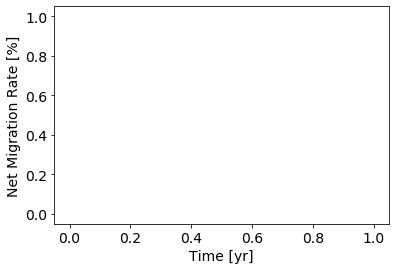

In [51]:
fig = plt.figure()
y = data_mig_loc['MigPercent']
x = data_mig_loc['MidPeriod']
plt.plot(x, 100*y)  
plt.xlabel('Time [yr]')
plt.ylabel('Net Migration Rate [%]')

In [12]:
fig.savefig('outputs/report/netmigrationrate_PH.eps', dpi=100, bbox_inches='tight')